In [65]:
import typing

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def visualizeDigitWithLabel(digit: np.ndarray, label: int):
    plt.imshow(digit.reshape(28,28), cmap="gray")
    plt.show()
    print("The label is: ", label)

In [49]:
full_dataset = pd.read_csv("./data.csv")

print("The head of the dataset is: ")
print(full_dataset.head(5), end="\n\n")

print("The dataset has shape: ")
print(full_dataset.shape)

The head of the dataset is: 
   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0

In [56]:
X = full_dataset.values[:,1:].T
y = full_dataset.values[:,0]

CHOSEN_LABELS = [0, 6, 8, 9]
CHOSEN_INDEXES = np.where(np.isin(y, CHOSEN_LABELS))[0]
X = X[:, CHOSEN_INDEXES]
y = y[CHOSEN_INDEXES]

N_TRAIN = int(len(y) * 0.75)
shuffled_indexes = np.arange(len(y))
np.random.shuffle(shuffled_indexes)
X_train, y_train = X[:, shuffled_indexes[:N_TRAIN]], y[shuffled_indexes[:N_TRAIN]]
X_test, y_test = X[:, shuffled_indexes[N_TRAIN:]], y[shuffled_indexes[N_TRAIN:]]

In [38]:
X_filtered.shape

(784, 16520)

In [32]:
X[:, CHOSEN_INDEXES]

array([[[0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0]]])

## VISUALIZING DYADS

In [243]:
import skimage
import math

def expSampleInterval(k, n_to_show):
    max_exp = math.log(k, 2)
    d = int(max_exp / (n_to_show - 1))
    indexes = [int(2 ** (d * i)) - 1 for i in range(n_to_show)]
    return indexes

In [244]:
def kRankApproximation(u: np.ndarray, s: np.ndarray, v: np.ndarray, k: int):
    approximation = np.zeros((512, 512))
    approximation += s[i] * u[:,i].reshape(-1,1) * v[i].reshape(1,-1)
    return approximation

def plotFFT(image: np.ndarray):
    fft_img = np.fft.fftshift(np.fft.fft2(image))
    plt.figure(num=None, figsize=(8, 6), dpi=80)
    plt.imshow(np.log(abs(fft_img)), cmap='gray');
    plt.show()

def visualizeDyads(skimage_ref: typing.Callable):
    image_as_array: np.ndarray = skimage_ref()
    
    assert len(image_as_array.shape) == 2, "Only grayscale images are allowed"

    print("The original image is the following:")
    plt.imshow(image_as_array, cmap="gray")
    plt.show()
    
    m, n = image_as_array.shape
    k = min(m, n)
    
    u, s, v = np.linalg.svd(image_as_array)
    
    dyads = [s[i] * u[:,i].reshape(-1,1) * v[i].reshape(1,-1) for i in range(k)]
    k_rank_approximations = np.cumsum(dyads, axis=0)
    approximation_error = [np.linalg.norm(image_as_array - k_rank_approximations[i], ord=2) 
                           for i in range(k)]
    stds = [np.std(dyads[i]) for i in range(k)]
    
    selected_dyads = expSampleInterval(k, 5)
    for i in selected_dyads:
        dyad = dyads[i]
        print("dyad numer %d:" % (i + 1))
        plt.imshow(dyad, cmap="gray")
        plt.show()
        print("Fourier transform of the dyad: ")
        plotFFT(dyad)
        print("\n\n")
        
        
    plt.plot(np.arange(k), stds)
    plt.show()

    plt.plot(np.arange(k), s)
    plt.show()
    
    for i in selected_dyads:
        plt.imshow(k_rank_approximations[i, :], cmap="gray")
        plt.show()
    
    plt.plot(np.arange(k), approximation_error)
    plt.show()
    
    compression_factors = np.arange(k) / (image_as_array.shape[0] * image_as_array.shape[1])
    plt.plot(np.arange(k), compression_factors)
    plt.show()

The original image is the following:


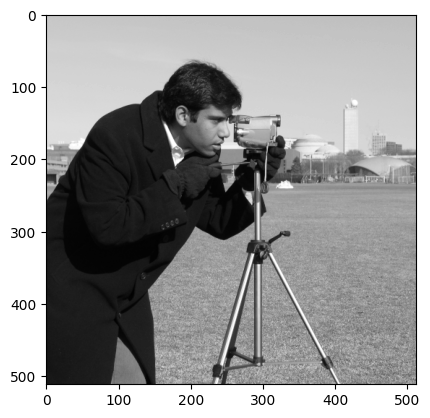

dyad numer 1:


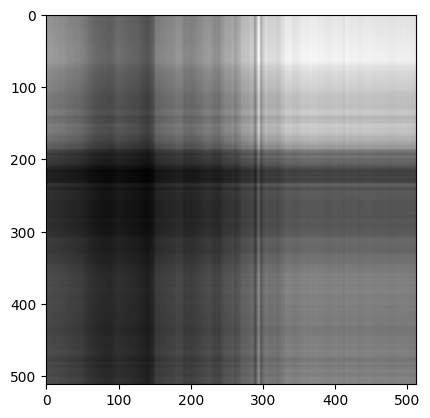

Fourier transform of the dyad: 


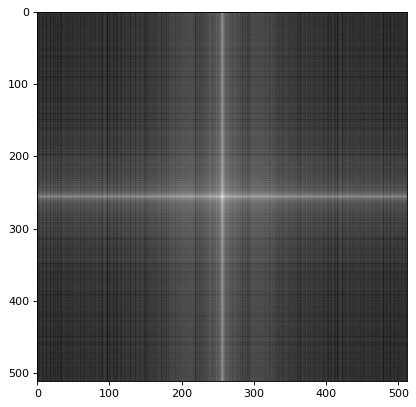




dyad numer 4:


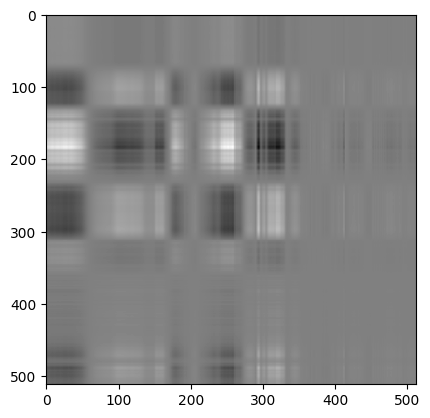

Fourier transform of the dyad: 


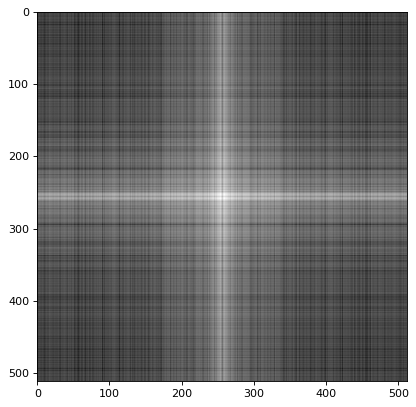




dyad numer 16:


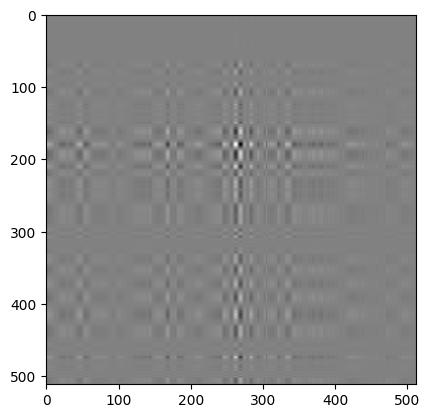

Fourier transform of the dyad: 


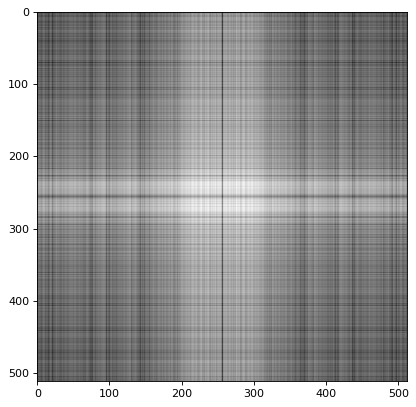




dyad numer 64:


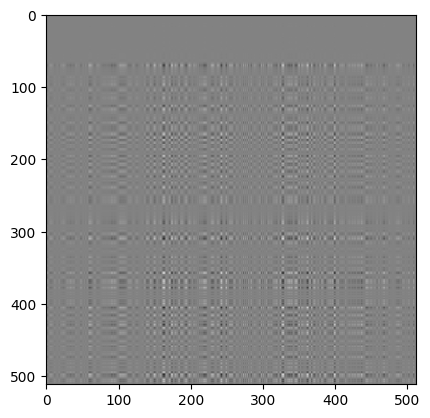

Fourier transform of the dyad: 


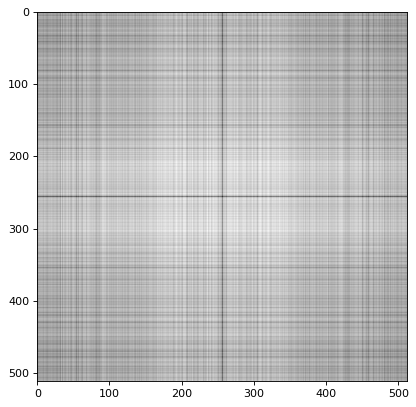




dyad numer 256:


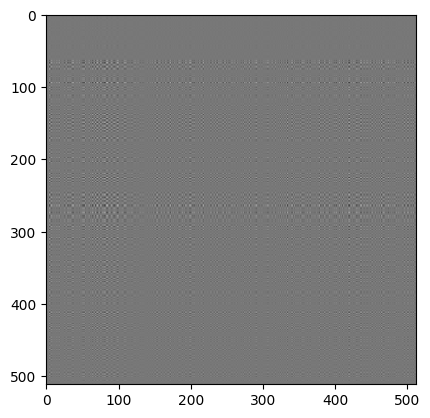

Fourier transform of the dyad: 


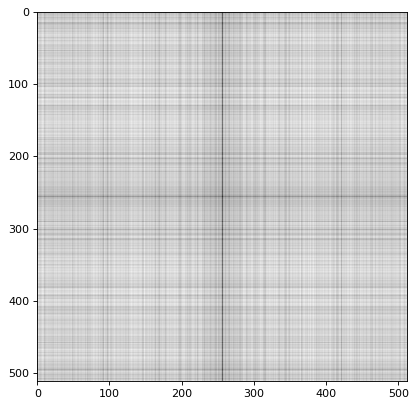

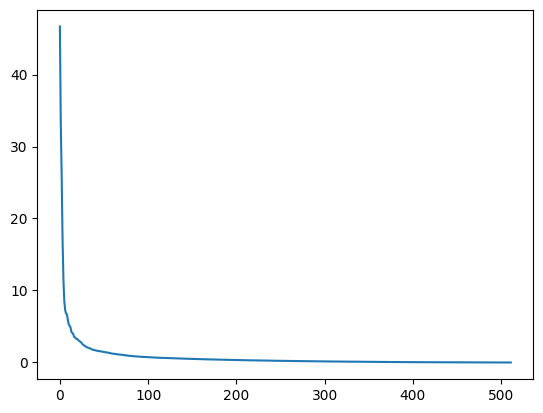

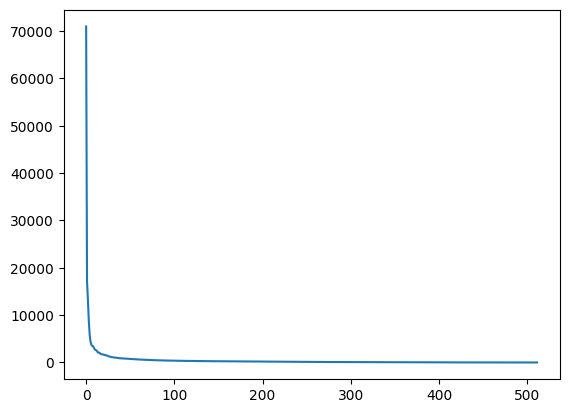

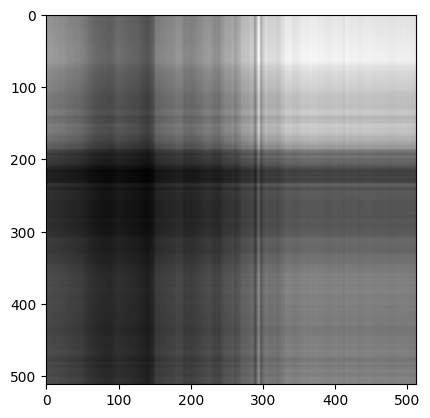

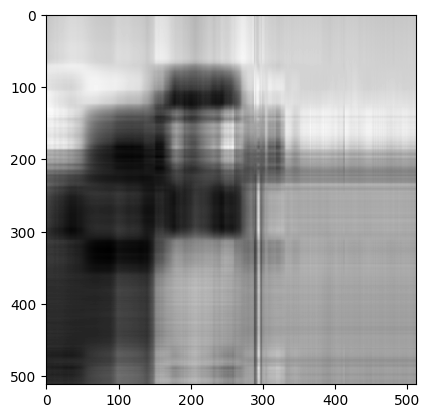

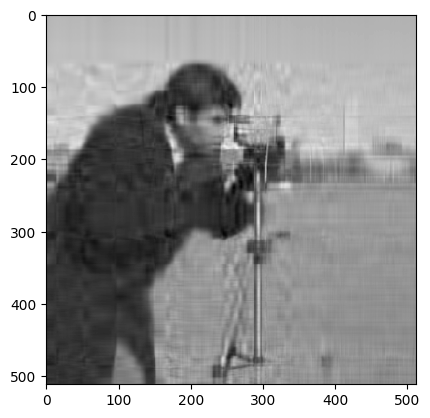

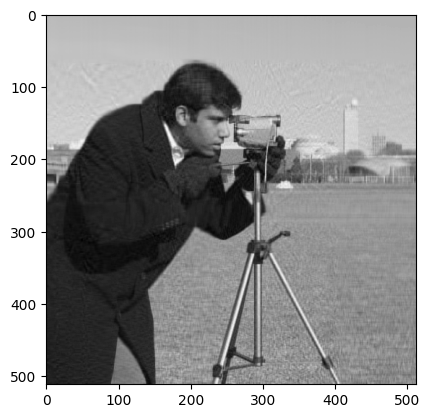

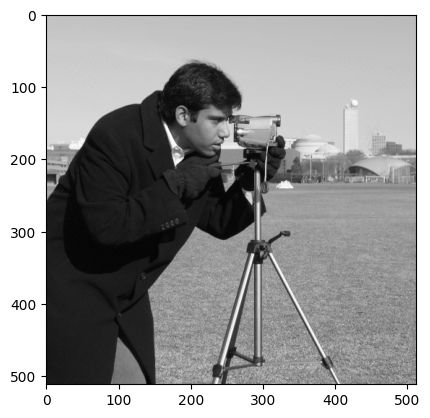

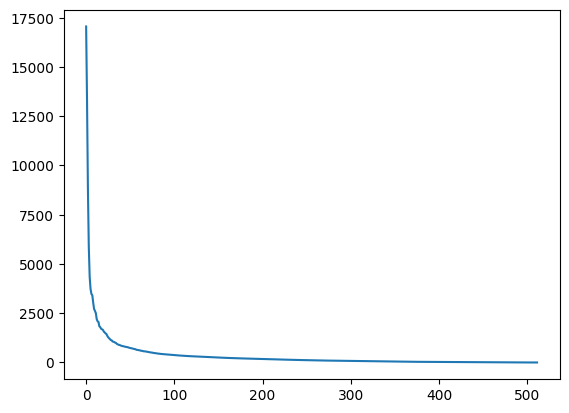

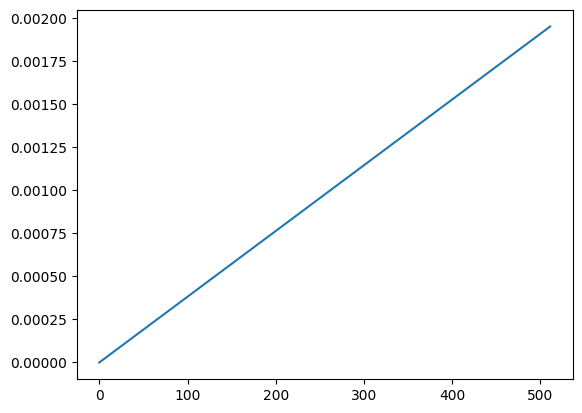

In [245]:
visualizeDyads(skimage.data.camera)